<a href="https://colab.research.google.com/github/elamukilan35/Forest_Cover_Prediction/blob/main/Logistic_Regression_Heart_datasets_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement: Predicting Heart Disease Risk
Heart disease is a leading global cause of death, necessitating early detection and prevention. This project aims to develop a machine learning model to predict heart disease risk using medical and lifestyle data. Key questions include identifying significant predictors and the model's accuracy across demographics. Data sources range from historical patient records to public health databases. Methodology involves data collection, feature selection, model development, and evaluation. The expected outcome is a predictive model for high-risk individuals and a tool for healthcare providers to implement early interventions.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



**Data science libraries** are essential for efficient data manipulation, analysis, and visualization. Key libraries include NumPy for numerical computations, Pandas for data handling, Matplotlib and Seaborn for visualization, and Scikit-Learn for machine learning. These tools streamline workflows and enhance insights from complex datasets.

In [3]:
df = pd.read_csv('/content/heart-1.csv')
df[:3]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


A dataset is a structured collection of data used for analysis and modeling. In heart disease prediction, it typically includes patient information such as age, gender, and medical metrics crucial for training machine learning models.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The isnull() function in pandas is used to detect missing values in a DataFrame or Series. It returns a boolean DataFrame or Series indicating the presence of null values, which helps in identifying and handling incomplete data.

In [40]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


The describe() function in data science provides summary statistics of a DataFrame or Series, giving insights into the distribution and central tendency of the data.

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The df.target.value_counts() function in pandas returns a Series with the count of unique values in the target column, helping to understand the distribution of target classes in the dataset.

In [6]:
df.target.value_counts()

,count
target,
1,165
0,138


creates a count plot showing the distribution of the target variable, with hues differentiating target categories, and labels the x-axis to represent sex (0 = female, 1 = male).

Text(0.5, 0, 'sex(0 = female, 1 = male)')

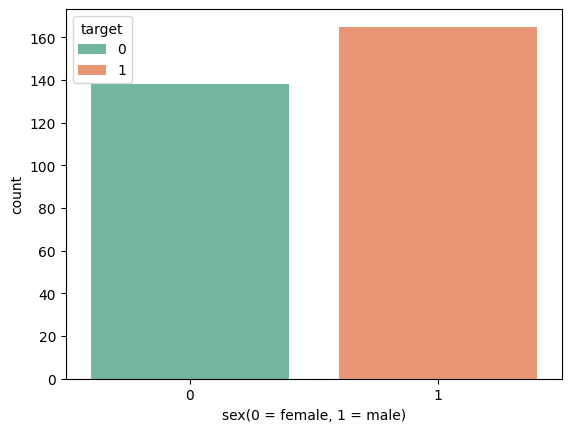

In [7]:
sns.countplot(x='target',hue = 'target', data = df, palette='Set2')
plt.xlabel('sex(0 = female, 1 = male)')

The code creates a customized heatmap of the correlation matrix for the DataFrame df, displaying correlation values with annotations, custom colors, and layout adjustments.

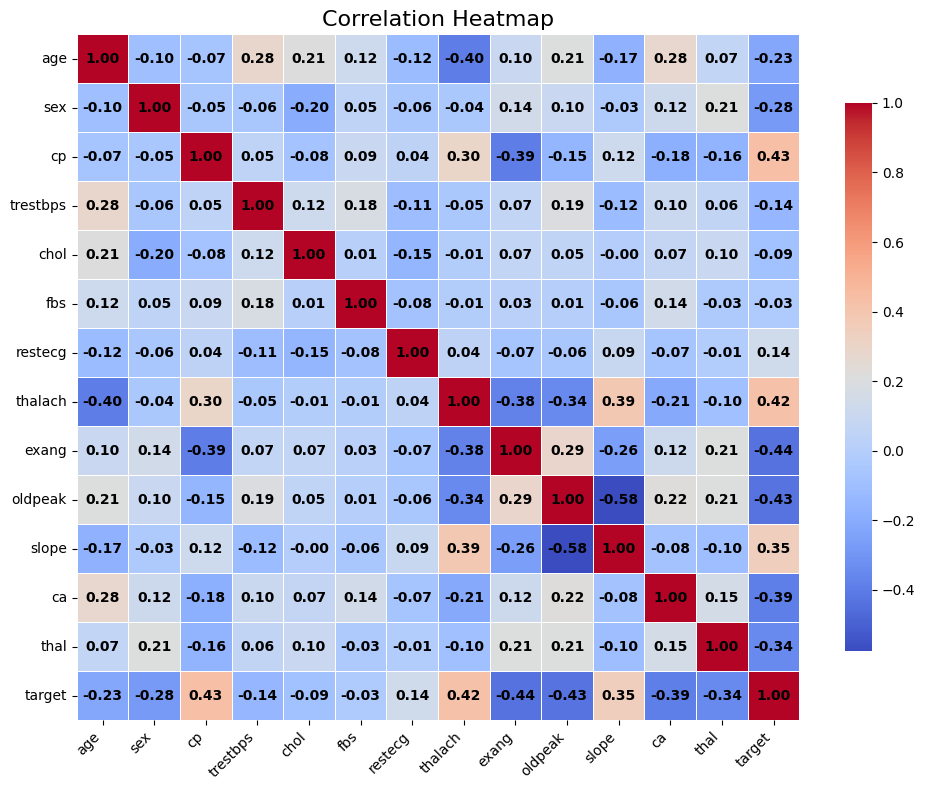

In [8]:
# Assuming 'df' is your DataFrame
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with additional customization
heatmap = sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'shrink': 0.8},
    annot_kws={"size": 10, "weight": "bold", "color": "black"}
)

# Add a title and adjust the layout
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

The code snippet performs univariate analysis by creating histograms for each feature in the DataFrame df, using a figure size of 12x10 and 20 bins, and then displays the plots.

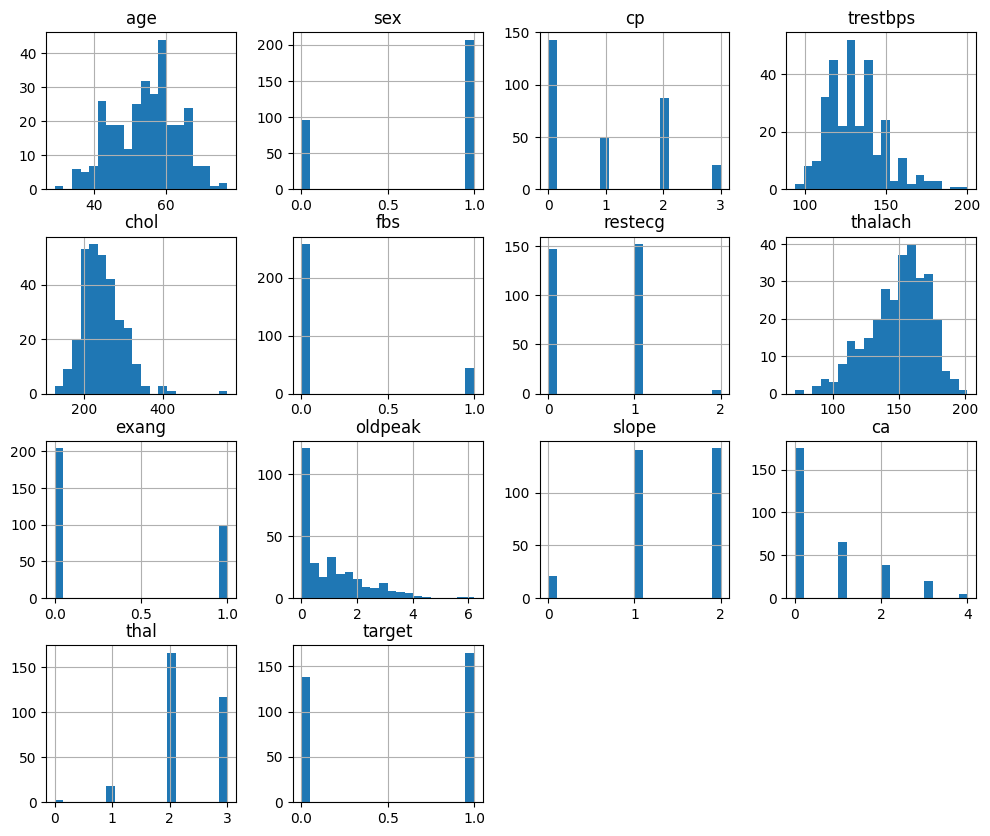

In [9]:
# prompt: bivariate, univariate and multivariate analysis

# Univariate Analysis
df.hist(figsize=(12, 10), bins=20)
plt.show()


The code calculates the percentage of patients with heart disease in the DataFrame df.  

*   It determines the total number of patients, counts those diagnosed with heart disease, and then computes the percentage.
*   The final output is a printed statement showing the percentage of patients with heart disease, rounded to two decimal places.



In [10]:
total_patients = len(df)
heart_disease_patients = df['target'].sum()  # Assuming 'target' column represents heart disease (1=yes, 0=no)
percentage_heart_disease = (heart_disease_patients / total_patients) * 100

print(f"Percentage of people with heart disease: {percentage_heart_disease:.2f}%")


Percentage of people with heart disease: 54.46%


The code calculates the average values of each feature grouped by the presence of heart disease. This helps in identifying which features differ significantly between patients with and without heart disease.

In [11]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


The code plots a bar graph to compare the mean values of different features for patients with and without heart disease. This helps identify which characteristics significantly vary between the two groups, aiding in heart disease prediction.

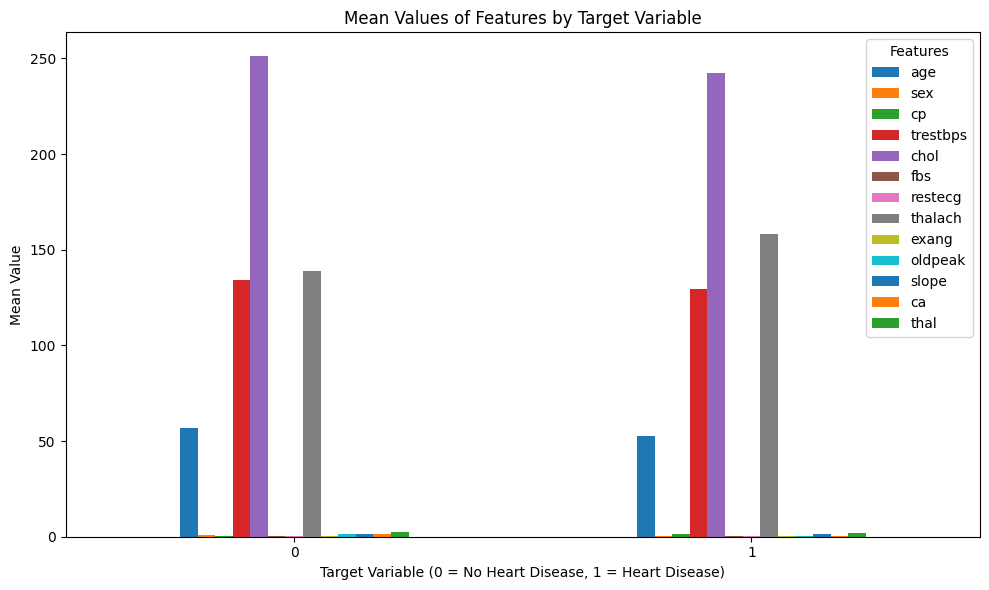

In [12]:
# prompt: plot a graph for df.groupby('target').mean()

df.groupby('target').mean().plot(kind='bar', figsize=(10, 6))
plt.title('Mean Values of Features by Target Variable')
plt.xlabel('Target Variable (0 = No Heart Disease, 1 = Heart Disease)')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(title='Features')
plt.tight_layout()
plt.show()


The code pd.crosstab(df.age, df.target).plot(kind='bar') creates a bar plot to visualize the distribution of age groups for different heart disease target classes.

<Axes: xlabel='age'>

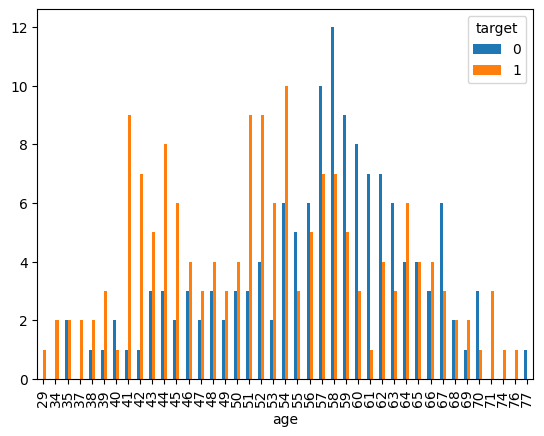

In [13]:
pd.crosstab(df.age,df.target).plot(kind="bar")


The code generates a bar plot to compare the distribution of heart disease incidence between male and female patients, providing insights into gender differences in heart disease prevalence.

Text(0.5, 0, 'sex(0 = female, 1 = male)')

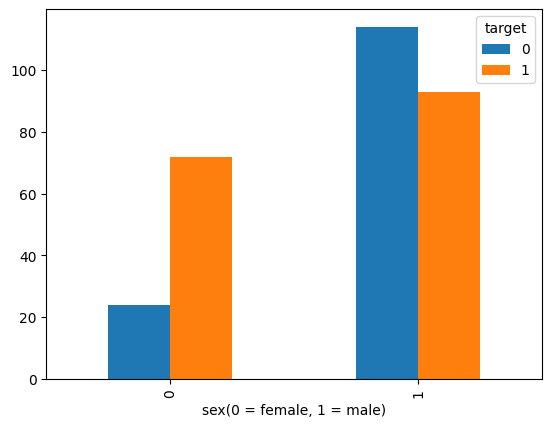

In [14]:
pd.crosstab(df.sex, df.target).plot(kind = 'bar')
plt.xlabel('sex(0 = female, 1 = male)')

The code creates a scatter plot to compare the relationship between age and maximum heart rate achieved (thalach) for patients with (red) and without (blue) heart disease.

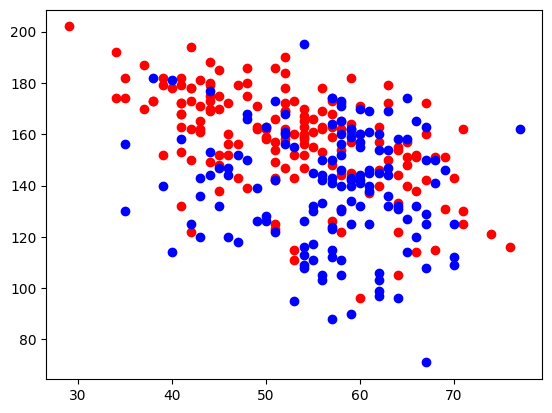

In [15]:
plt.scatter(x = df.age[df.target == 1],
            y = df.thalach[df.target == 1], color = 'red')
plt.scatter(x = df.age[df.target == 0],
            y = df.thalach[df.target == 0], color = 'blue')

<Axes: xlabel='cp'>

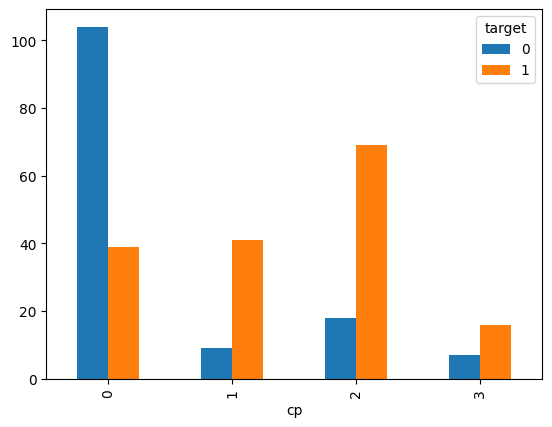

In [16]:
pd.crosstab(df.cp, df.target).plot(kind = 'bar')

The function detect_outliers_iqr identifies outliers in the specified column of the DataFrame using the Interquartile Range (IQR) method, and the returned result indicates whether each data point in the 'age' column is an outlier.

In [26]:
def detect_outliers_iqr(data, column):

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ~data[column].between(lower_bound, upper_bound)

outliers = detect_outliers_iqr(df, 'age')
print(outliers)

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Name: age, Length: 303, dtype: bool


The code calculates the skewness for each column in the DataFrame df, which indicates the asymmetry of the data distribution. A positive skewness value signifies a right-skewed distribution, while a negative value indicates a left-skewed distribution. Analyzing skewness helps in understanding the distribution patterns and identifying potential transformations needed to normalize the data for better model performance.

In [29]:
# To know skewness of all columns
skewness_all = df.skew()
print(f"Skewness of all columns : \n{skewness_all}")

Skewness of all columns : 
age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64


The code uses SelectKBest with ANOVA F-value (f_classif) to select the top 8 features most relevant to predicting the target variable, then creates a new DataFrame with these selected features and the target variable for further analysis.

In [33]:
from sklearn.feature_selection import SelectKBest, f_classif

# x is feature variable and y is target variable
x = df.drop('target', axis=1)
y = df['target']

selector = SelectKBest(f_classif, k=8)
x_new = selector.fit_transform(x, y)

selected_features = x.columns[selector.get_support()]
print(f"Selected Features:\n{selected_features}")

# Create a new DataFrame with only the selected features
df_selected = pd.DataFrame(x_new, columns=selected_features)
df_selected['target'] = y

print(df_selected.head())


Selected Features:
Index(['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype='object')
   sex   cp  thalach  exang  oldpeak  slope   ca  thal  target
0  1.0  3.0    150.0    0.0      2.3    0.0  0.0   1.0       1
1  1.0  2.0    187.0    0.0      3.5    0.0  0.0   2.0       1
2  0.0  1.0    172.0    0.0      1.4    2.0  0.0   2.0       1
3  1.0  1.0    178.0    0.0      0.8    2.0  0.0   2.0       1
4  0.0  0.0    163.0    1.0      0.6    2.0  0.0   2.0       1


In [36]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sex      303 non-null    float64
 1   cp       303 non-null    float64
 2   thalach  303 non-null    float64
 3   exang    303 non-null    float64
 4   oldpeak  303 non-null    float64
 5   slope    303 non-null    float64
 6   ca       303 non-null    float64
 7   thal     303 non-null    float64
 8   target   303 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 21.4 KB


The code splits the selected features and target variable into training and testing sets, with 80% for training and 20% for testing, ensuring reproducibility with a specified random state.



In [39]:
# Train test split function
from sklearn.model_selection import train_test_split
df_features = df_selected.copy()

x = df_features.drop('target', axis=1)
y = df_features['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

The code trains a logistic regression model on the training data and then uses the trained model to make predictions on the test data, storing the predicted values in y_pred.

In [43]:
from sklearn.linear_model import LogisticRegression
# model training
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The code calculates and prints the test accuracy of the logistic regression model, indicating the percentage of correct predictions made on the test data.

In [44]:
print(f"Test Accuracy :{lr.score(x_test, y_test)* 100}")

Test Accuracy :86.88524590163934


The code generates a classification report and a confusion matrix, providing detailed metrics such as precision, recall, F1-score, and support for each class, as well as the counts of true positive, true negative, false positive, and false negative predictions.

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming y_test and y_pred are defined from the previous code
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

[[25  4]
 [ 4 28]]


The code calculates and prints the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) values for the logistic regression model's predictions, providing insights into the model's performance and accuracy.



In [46]:
# prompt: mse, rmse, r2_score

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming y_test and y_pred are defined from the previous code
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 0.13114754098360656
Root Mean Squared Error (RMSE): 0.3621429841700741
R-squared (R2): 0.47413793103448276
